<center><h1>1-ab: Introduction to Neural Networks</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

# Warning :
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [1]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
!unzip -j 2-ab.zip
!wget https://github.com/rdfia/rdfia.github.io/raw/master/code/2-ab/utils-data.py

--2024-10-29 17:18:33--  https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip [following]
--2024-10-29 17:18:33--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/2-ab.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13423991 (13M) [application/zip]
Saving to: ‘2-ab.zip’

2-ab.zip            100%[===================>]  12.80M  78.3MB/s    in 0.2s    

2024-10-29 17:18:34 (78.3 MB/s) - ‘2-ab.zip’ saved [13423991/13423991]

Archive:  2-ab.zip
  inflating: ._2-ab           

In [2]:
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%run 'utils-data.py'

# Part 1 : Forward and backward passes "by hands"

In [20]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by

    params["Wh"] = torch.randn(nh,nx) * 0.3  #Wh of dimension |numbers of neurons X numbers of input x |
    params["Wy"] = torch.randn(ny,nh) * 0.3  #Wy of dimension |numbers of neurons X numbers of input h |
    params["bh"] = torch.zeros(nh)
    params["by"] = torch.zeros(ny)

    ####################
    ##      END        #
    ####################
    return params

In [21]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params['Wh'].size(0)
    ny = params['Wy'].size(0)
    outputs = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for X, htilde, h, ytilde, yhat

    bh = params['bh']
    by = params['by']
    Wh = params['Wh']
    Wy = params['Wy']

    htilde = torch.mm(X, Wh.T) + bh.repeat(bsize, 1)
    h = torch.tanh(htilde)
    hsize = h.size(0)
    ytilde = torch.mm(h, Wy.T)+ by.repeat(hsize, 1)
    yhat = torch.exp(ytilde) / torch.sum(torch.exp(ytilde), 1, keepdim=True)

    outputs["X"] = X
    outputs["htilde"] = htilde
    outputs["h"] = h
    outputs["ytilde"] = ytilde
    outputs["yhat"] = yhat

    ####################
    ##      END        #
    ####################

    return outputs['yhat'], outputs

In [22]:
def loss_accuracy(Yhat, Y):

    #####################
    ## Your code here  ##
    #####################

    L = - torch.mean(torch.sum(Y *torch.log(Yhat)))

    res = torch.argmax(Yhat,dim=1) #tensor (batch_size x 1) with indexes of the highest value for each example

    predicted_c = torch.zeros_like(Yhat)  # predicted_c needs to have the same shape as Yhat(batch_size x 2)

    predicted_c.scatter_(1, res.unsqueeze(1), 1) # we put 1 at the specified indexes

    acc = (predicted_c == Y).float().mean() * 100

    ####################
    ##      END        #
    ####################

    return L, acc

In [23]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wy, Wh, by, bh

    bh = params['bh']
    by = params['by']
    Wh = params['Wh']
    Wy = params['Wy']

    X = outputs["X"]
    htilde = outputs["htilde"]
    h =outputs["h"]
    ytilde = outputs["ytilde"]
    yhat = outputs["yhat"]

    grad_ytilde = yhat - Y
    tmp = torch.mm(grad_ytilde, Wy) ################
    grad_htilde = torch.mul(tmp, 1 - h**2)

    grads["Wy"] = torch.mm(grad_ytilde.T, h)
    grads["Wh"] = torch.mm(grad_htilde.T, X)
    grads["by"] = grad_ytilde.sum(dim=0).T
    grads["bh"] = grad_htilde.sum(dim=0).T

    #####################
    ##      END        ##
    #####################
    return grads

In [24]:
def sgd(params, grads, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the params values

    gWy = grads["Wy"]
    gWh = grads["Wh"]
    gby = grads["by"]
    gbh = grads["bh"]

    params["Wh"] -= eta*gWh
    params["Wy"] -= eta*gWy
    params["bh"] -= eta*gbh
    params["by"] -= eta*gby

    #####################
    ##      END        ##
    #####################
    return params

## Global learning procedure "by hands"

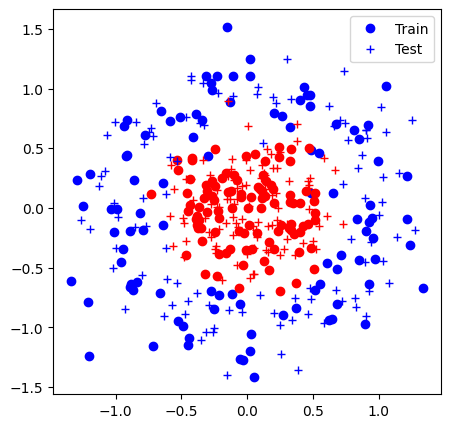

Iter 0: Acc train 62.5% (138.39), acc test 62.0% (138.40)


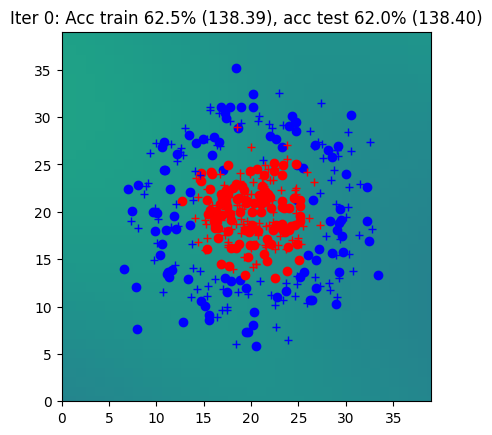

Iter 1: Acc train 57.0% (138.18), acc test 56.0% (138.49)
Iter 2: Acc train 63.0% (137.66), acc test 62.5% (138.01)
Iter 3: Acc train 50.0% (137.75), acc test 50.0% (138.12)
Iter 4: Acc train 51.5% (137.12), acc test 50.0% (137.54)
Iter 5: Acc train 50.0% (136.17), acc test 50.0% (136.60)
Iter 6: Acc train 76.5% (132.95), acc test 72.0% (133.91)
Iter 7: Acc train 50.0% (131.44), acc test 50.0% (132.56)
Iter 8: Acc train 77.5% (124.61), acc test 74.0% (126.42)
Iter 9: Acc train 50.0% (125.99), acc test 50.0% (128.39)
Iter 10: Acc train 81.0% (111.88), acc test 77.5% (114.65)
Iter 11: Acc train 81.5% (105.22), acc test 77.0% (108.71)
Iter 12: Acc train 81.5% (97.11), acc test 76.5% (102.25)
Iter 13: Acc train 76.5% (97.26), acc test 73.5% (103.39)
Iter 14: Acc train 82.5% (84.83), acc test 78.5% (91.10)
Iter 15: Acc train 91.0% (80.65), acc test 84.5% (84.32)
Iter 16: Acc train 91.0% (69.76), acc test 86.5% (73.59)
Iter 17: Acc train 93.0% (63.26), acc test 89.0% (67.87)
Iter 18: Acc tra

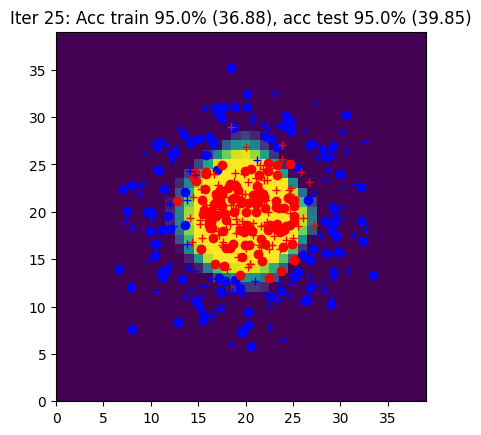

Iter 26: Acc train 94.5% (37.15), acc test 94.5% (41.39)
Iter 27: Acc train 95.5% (36.85), acc test 95.0% (35.80)
Iter 28: Acc train 95.0% (34.82), acc test 95.0% (34.64)
Iter 29: Acc train 95.5% (32.88), acc test 95.0% (36.67)
Iter 30: Acc train 94.5% (33.73), acc test 95.5% (37.24)
Iter 31: Acc train 94.0% (32.87), acc test 95.0% (36.48)
Iter 32: Acc train 94.5% (31.52), acc test 95.0% (35.93)
Iter 33: Acc train 95.5% (30.34), acc test 96.0% (33.56)
Iter 34: Acc train 94.5% (31.37), acc test 95.5% (37.52)
Iter 35: Acc train 94.0% (32.28), acc test 95.0% (40.38)
Iter 36: Acc train 96.0% (28.94), acc test 95.5% (32.00)
Iter 37: Acc train 95.5% (29.22), acc test 94.5% (34.47)
Iter 38: Acc train 94.5% (29.74), acc test 93.0% (35.80)
Iter 39: Acc train 96.0% (27.94), acc test 96.0% (32.09)
Iter 40: Acc train 94.5% (30.61), acc test 94.5% (39.76)
Iter 41: Acc train 94.0% (28.81), acc test 94.5% (39.10)
Iter 42: Acc train 94.5% (29.14), acc test 96.0% (35.84)
Iter 43: Acc train 94.5% (27.11

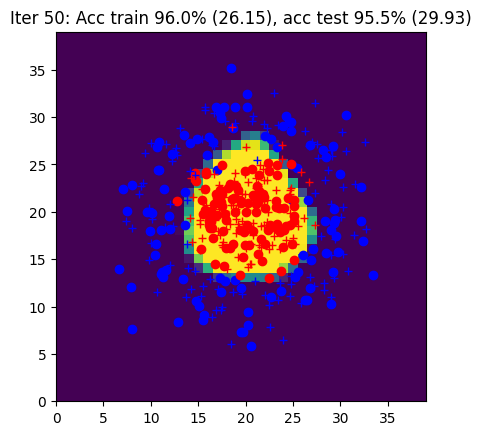

Iter 51: Acc train 95.5% (25.54), acc test 95.5% (29.95)
Iter 52: Acc train 96.0% (25.40), acc test 95.0% (32.91)
Iter 53: Acc train 94.5% (26.86), acc test 95.0% (35.23)
Iter 54: Acc train 95.0% (25.65), acc test 95.0% (35.85)
Iter 55: Acc train 94.5% (27.46), acc test 93.5% (40.40)
Iter 56: Acc train 96.5% (24.92), acc test 95.5% (32.34)
Iter 57: Acc train 96.0% (26.97), acc test 95.0% (30.57)
Iter 58: Acc train 95.5% (24.68), acc test 95.5% (30.65)
Iter 59: Acc train 95.5% (25.75), acc test 93.5% (36.83)
Iter 60: Acc train 95.5% (26.04), acc test 94.5% (31.22)
Iter 61: Acc train 93.5% (28.64), acc test 94.5% (36.34)
Iter 62: Acc train 96.5% (24.73), acc test 95.5% (29.50)
Iter 63: Acc train 96.0% (24.31), acc test 95.5% (31.69)
Iter 64: Acc train 94.5% (24.86), acc test 95.5% (35.18)
Iter 65: Acc train 96.5% (24.81), acc test 95.0% (31.10)
Iter 66: Acc train 93.0% (29.39), acc test 93.5% (42.24)
Iter 67: Acc train 97.0% (24.20), acc test 94.5% (33.86)
Iter 68: Acc train 93.5% (27.04

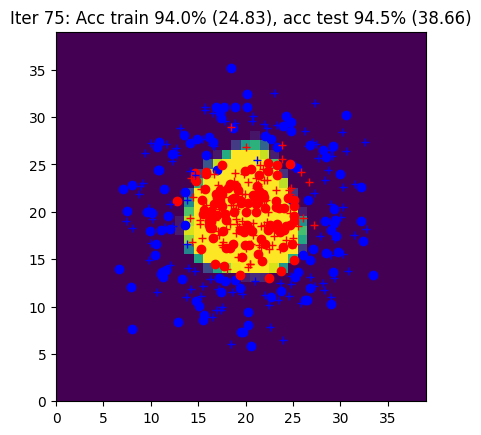

Iter 76: Acc train 97.0% (23.10), acc test 95.0% (32.56)
Iter 77: Acc train 96.0% (23.37), acc test 95.5% (32.78)
Iter 78: Acc train 97.0% (22.98), acc test 95.5% (32.11)
Iter 79: Acc train 95.0% (23.77), acc test 94.0% (35.81)
Iter 80: Acc train 95.0% (24.51), acc test 93.5% (40.34)
Iter 81: Acc train 95.0% (26.31), acc test 93.5% (38.65)
Iter 82: Acc train 96.0% (24.44), acc test 93.5% (40.00)
Iter 83: Acc train 96.5% (23.52), acc test 94.0% (35.53)
Iter 84: Acc train 95.0% (24.54), acc test 94.0% (35.18)
Iter 85: Acc train 94.0% (32.12), acc test 92.0% (39.67)
Iter 86: Acc train 96.5% (22.61), acc test 95.0% (33.95)
Iter 87: Acc train 96.0% (23.92), acc test 94.5% (34.56)
Iter 88: Acc train 93.0% (27.63), acc test 93.0% (44.18)
Iter 89: Acc train 96.5% (23.25), acc test 96.0% (32.53)
Iter 90: Acc train 95.5% (26.68), acc test 92.5% (43.46)
Iter 91: Acc train 94.5% (24.53), acc test 94.5% (35.27)
Iter 92: Acc train 97.0% (22.80), acc test 93.5% (39.45)
Iter 93: Acc train 93.0% (32.34

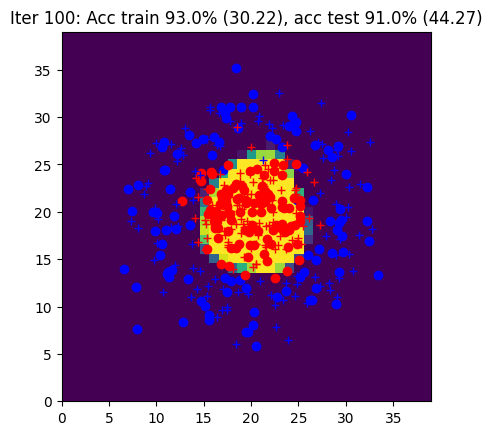

Iter 101: Acc train 96.0% (22.17), acc test 94.5% (36.38)
Iter 102: Acc train 96.5% (22.83), acc test 94.0% (35.57)
Iter 103: Acc train 96.5% (21.95), acc test 94.5% (34.69)
Iter 104: Acc train 97.0% (21.71), acc test 94.0% (35.93)
Iter 105: Acc train 95.0% (23.99), acc test 93.0% (44.21)
Iter 106: Acc train 95.0% (25.41), acc test 94.0% (32.45)
Iter 107: Acc train 94.5% (24.18), acc test 93.0% (47.15)
Iter 108: Acc train 96.0% (22.82), acc test 95.0% (32.46)
Iter 109: Acc train 97.0% (21.07), acc test 93.5% (39.59)
Iter 110: Acc train 96.5% (22.10), acc test 94.0% (39.56)
Iter 111: Acc train 97.0% (20.65), acc test 95.5% (33.30)
Iter 112: Acc train 97.0% (21.33), acc test 94.0% (34.99)
Iter 113: Acc train 96.0% (22.24), acc test 93.5% (43.67)
Iter 114: Acc train 95.0% (24.39), acc test 93.5% (40.93)
Iter 115: Acc train 97.0% (20.33), acc test 94.5% (34.80)
Iter 116: Acc train 96.5% (21.46), acc test 94.5% (32.23)
Iter 117: Acc train 97.5% (23.18), acc test 94.0% (36.06)
Iter 118: Acc 

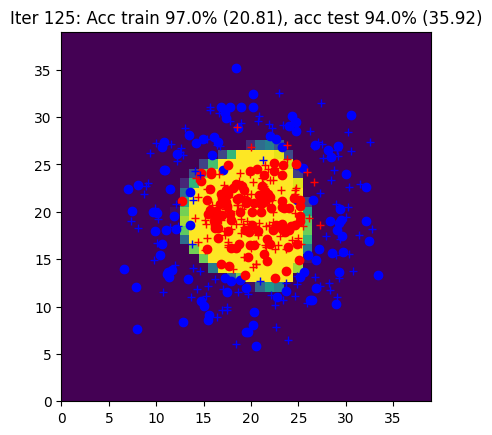

Iter 126: Acc train 95.5% (23.11), acc test 93.5% (42.90)
Iter 127: Acc train 94.5% (22.42), acc test 93.5% (41.76)
Iter 128: Acc train 97.0% (19.85), acc test 94.5% (33.25)
Iter 129: Acc train 96.0% (20.72), acc test 94.0% (40.54)
Iter 130: Acc train 97.0% (19.69), acc test 94.5% (33.70)
Iter 131: Acc train 96.5% (20.13), acc test 94.0% (38.35)
Iter 132: Acc train 96.5% (19.41), acc test 94.5% (35.74)
Iter 133: Acc train 97.0% (20.09), acc test 94.0% (36.70)
Iter 134: Acc train 94.5% (23.67), acc test 91.5% (51.15)
Iter 135: Acc train 95.5% (21.12), acc test 93.5% (40.43)
Iter 136: Acc train 97.0% (18.95), acc test 94.0% (37.15)
Iter 137: Acc train 97.0% (18.94), acc test 93.5% (38.23)
Iter 138: Acc train 96.5% (19.42), acc test 94.5% (33.38)
Iter 139: Acc train 96.0% (19.96), acc test 93.0% (37.67)
Iter 140: Acc train 96.0% (23.33), acc test 93.5% (34.91)
Iter 141: Acc train 96.0% (20.37), acc test 94.5% (43.03)
Iter 142: Acc train 94.0% (22.83), acc test 92.5% (51.72)
Iter 143: Acc 

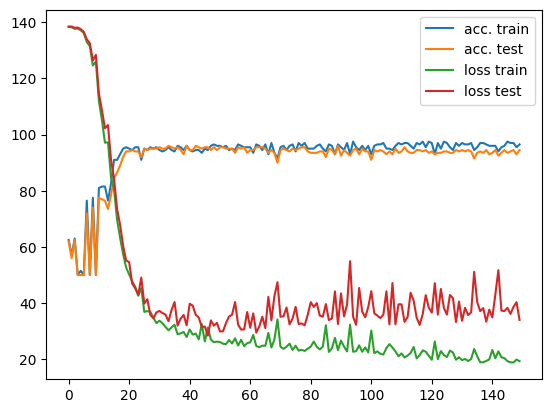

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[], [], [], []]


# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):
        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, backward, sgd

        yhat, outputs = forward(params, X)
        L, acc = loss_accuracy(yhat, Y)
        grads = backward(params, outputs, Y)
        params = sgd(params, grads, eta)

    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    data.plot_data_with_grid(Ygrid, title) if iteration % 25 == 0 else None

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 2 : Simplification of the backward pass with `torch.autograd`



In [ ]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    # activaye autograd on the network weights

    params["Wh"] = torch.randn(nh, nx, requires_grad=True)
    params["Wy"] = torch.randn(ny, nh, requires_grad=True)
    params["bh"] = torch.zeros(nh, requires_grad=True)
    params["by"] = torch.zeros(ny, requires_grad=True)

    ####################
    ##      END        #
    ####################
    return params

The function `forward` remains unchanged from previous part.

The function `backward` is no longer used because of "autograd".

In [ ]:
def sgd(params, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    with torch.no_grad():
        for param in params.values():
            if param.grad is not None:
                param -= eta * param.grad  # Gradient descent step
                param.grad.zero_()

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure with autograd

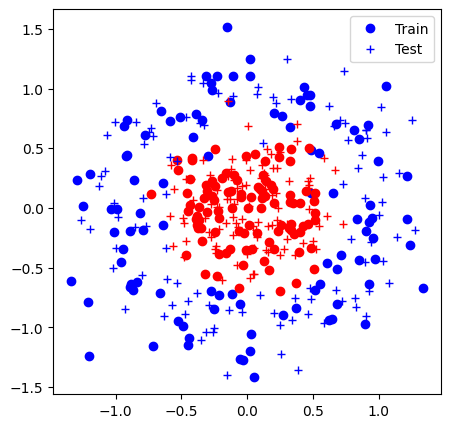

Iter 0: Acc train 61.5% (123.51), acc test 57.5% (128.75)


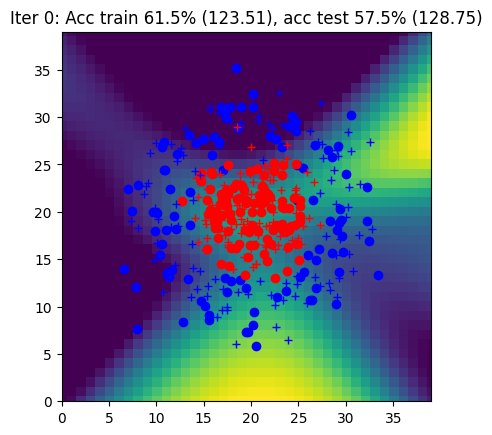

Iter 1: Acc train 78.5% (101.89), acc test 79.5% (107.23)
Iter 2: Acc train 87.5% (85.37), acc test 85.5% (90.06)
Iter 3: Acc train 90.5% (74.47), acc test 92.0% (78.84)
Iter 4: Acc train 94.5% (61.53), acc test 94.0% (65.81)
Iter 5: Acc train 95.0% (54.29), acc test 94.0% (58.67)
Iter 6: Acc train 91.5% (52.95), acc test 93.0% (57.85)
Iter 7: Acc train 95.0% (45.03), acc test 94.0% (48.55)
Iter 8: Acc train 96.5% (43.17), acc test 93.0% (49.86)
Iter 9: Acc train 95.0% (40.38), acc test 95.0% (41.67)
Iter 10: Acc train 94.5% (37.55), acc test 95.0% (39.82)
Iter 11: Acc train 94.5% (35.98), acc test 95.0% (38.73)
Iter 12: Acc train 95.5% (34.15), acc test 94.5% (38.90)
Iter 13: Acc train 95.5% (33.97), acc test 95.0% (38.06)
Iter 14: Acc train 95.5% (33.37), acc test 93.0% (38.91)
Iter 15: Acc train 94.5% (32.78), acc test 95.0% (39.07)
Iter 16: Acc train 96.5% (31.33), acc test 94.0% (36.56)
Iter 17: Acc train 94.5% (32.22), acc test 92.5% (36.06)
Iter 18: Acc train 94.5% (31.89), acc 

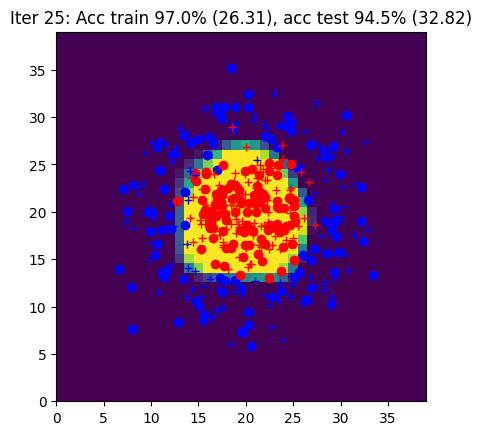

Iter 26: Acc train 95.0% (26.88), acc test 94.5% (33.82)
Iter 27: Acc train 95.0% (25.31), acc test 94.5% (30.03)
Iter 28: Acc train 96.5% (24.79), acc test 95.5% (29.72)
Iter 29: Acc train 95.5% (25.28), acc test 96.0% (30.24)
Iter 30: Acc train 96.5% (24.45), acc test 95.0% (31.54)
Iter 31: Acc train 97.0% (24.31), acc test 95.0% (31.96)
Iter 32: Acc train 96.5% (25.35), acc test 94.0% (36.75)
Iter 33: Acc train 95.0% (25.29), acc test 95.0% (31.10)
Iter 34: Acc train 96.5% (23.50), acc test 94.5% (31.22)
Iter 35: Acc train 97.0% (23.25), acc test 95.0% (30.44)
Iter 36: Acc train 95.5% (23.39), acc test 96.0% (29.38)
Iter 37: Acc train 97.5% (22.84), acc test 95.0% (30.01)
Iter 38: Acc train 95.5% (23.42), acc test 95.5% (29.79)
Iter 39: Acc train 97.0% (23.59), acc test 94.5% (30.46)
Iter 40: Acc train 95.0% (23.96), acc test 95.5% (29.86)
Iter 41: Acc train 96.5% (23.17), acc test 94.5% (27.23)
Iter 42: Acc train 96.5% (22.61), acc test 95.5% (31.53)
Iter 43: Acc train 96.0% (22.87

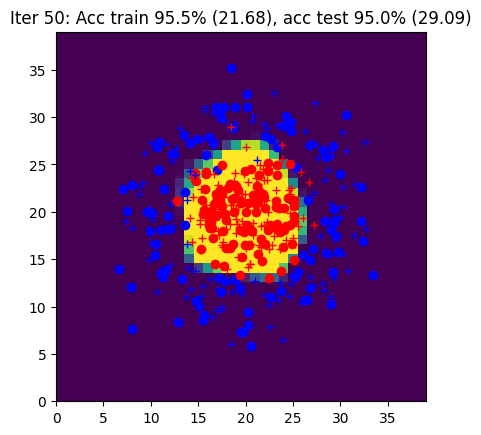

Iter 51: Acc train 97.0% (21.10), acc test 95.0% (31.27)
Iter 52: Acc train 96.0% (21.58), acc test 95.5% (30.52)
Iter 53: Acc train 97.5% (20.62), acc test 95.5% (27.98)
Iter 54: Acc train 96.0% (21.34), acc test 95.5% (26.96)
Iter 55: Acc train 95.5% (22.37), acc test 94.5% (32.48)
Iter 56: Acc train 96.5% (20.87), acc test 95.5% (31.19)
Iter 57: Acc train 97.5% (20.43), acc test 94.0% (30.98)
Iter 58: Acc train 95.5% (21.61), acc test 94.0% (31.08)
Iter 59: Acc train 96.5% (21.36), acc test 94.5% (33.80)
Iter 60: Acc train 96.0% (20.75), acc test 95.5% (29.39)
Iter 61: Acc train 94.5% (24.30), acc test 93.5% (35.83)
Iter 62: Acc train 97.0% (21.80), acc test 94.0% (33.77)
Iter 63: Acc train 96.0% (21.81), acc test 94.0% (33.40)
Iter 64: Acc train 97.5% (19.74), acc test 95.0% (28.17)
Iter 65: Acc train 95.5% (24.37), acc test 92.0% (35.74)
Iter 66: Acc train 96.5% (20.12), acc test 95.5% (29.65)
Iter 67: Acc train 96.5% (20.35), acc test 94.5% (33.21)
Iter 68: Acc train 97.0% (19.59

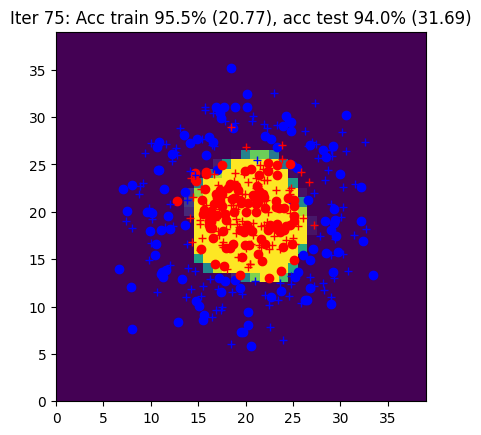

Iter 76: Acc train 97.5% (19.45), acc test 95.5% (28.70)
Iter 77: Acc train 97.0% (19.67), acc test 93.5% (30.91)
Iter 78: Acc train 96.5% (22.92), acc test 93.5% (28.54)
Iter 79: Acc train 96.5% (19.82), acc test 95.0% (33.77)
Iter 80: Acc train 97.0% (20.36), acc test 94.0% (30.81)
Iter 81: Acc train 97.5% (19.16), acc test 95.0% (28.42)
Iter 82: Acc train 97.5% (18.74), acc test 94.0% (30.41)
Iter 83: Acc train 95.5% (19.54), acc test 94.5% (31.86)
Iter 84: Acc train 95.5% (20.44), acc test 94.5% (35.98)
Iter 85: Acc train 97.5% (18.34), acc test 95.0% (31.48)
Iter 86: Acc train 94.5% (23.57), acc test 94.0% (42.36)
Iter 87: Acc train 97.0% (18.33), acc test 94.5% (30.01)
Iter 88: Acc train 97.0% (20.01), acc test 93.5% (31.38)
Iter 89: Acc train 96.5% (18.26), acc test 94.0% (31.39)
Iter 90: Acc train 97.0% (19.40), acc test 95.5% (25.63)
Iter 91: Acc train 97.0% (19.09), acc test 93.5% (28.67)
Iter 92: Acc train 95.5% (20.25), acc test 94.5% (36.47)
Iter 93: Acc train 97.0% (19.18

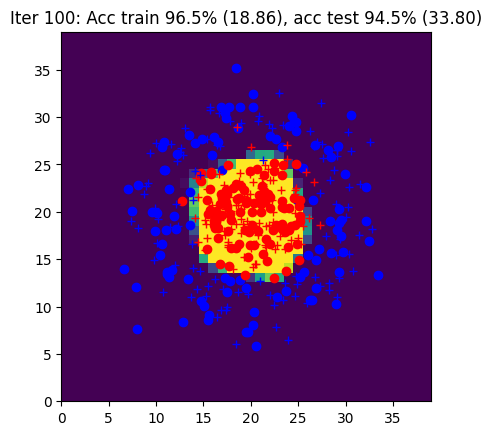

Iter 101: Acc train 97.5% (18.07), acc test 94.5% (29.96)
Iter 102: Acc train 97.5% (17.48), acc test 95.5% (28.28)
Iter 103: Acc train 97.0% (17.18), acc test 94.5% (29.19)
Iter 104: Acc train 95.5% (19.39), acc test 94.0% (36.12)
Iter 105: Acc train 97.5% (16.96), acc test 94.5% (31.90)
Iter 106: Acc train 97.0% (18.11), acc test 94.5% (34.11)
Iter 107: Acc train 97.5% (20.07), acc test 93.5% (33.65)
Iter 108: Acc train 97.5% (17.96), acc test 95.5% (27.28)
Iter 109: Acc train 97.0% (17.23), acc test 93.5% (31.75)
Iter 110: Acc train 97.0% (19.33), acc test 94.0% (30.03)
Iter 111: Acc train 97.5% (17.06), acc test 94.5% (28.64)
Iter 112: Acc train 97.0% (18.68), acc test 93.0% (31.41)
Iter 113: Acc train 96.5% (21.02), acc test 94.0% (29.26)
Iter 114: Acc train 97.0% (17.79), acc test 95.5% (27.62)
Iter 115: Acc train 97.5% (16.67), acc test 95.0% (27.86)
Iter 116: Acc train 97.0% (16.58), acc test 94.0% (31.54)
Iter 117: Acc train 97.5% (16.86), acc test 95.0% (27.81)
Iter 118: Acc 

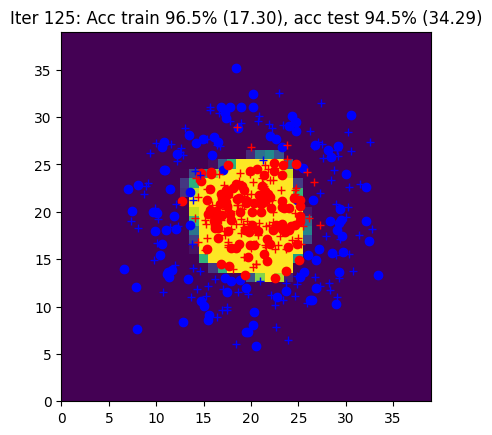

Iter 126: Acc train 96.5% (16.92), acc test 93.5% (34.47)
Iter 127: Acc train 96.5% (18.71), acc test 93.0% (31.55)
Iter 128: Acc train 97.5% (17.29), acc test 94.5% (26.99)
Iter 129: Acc train 97.5% (16.28), acc test 94.0% (34.91)
Iter 130: Acc train 97.0% (16.31), acc test 94.0% (32.58)
Iter 131: Acc train 96.5% (16.17), acc test 94.5% (32.04)
Iter 132: Acc train 97.5% (16.42), acc test 95.5% (27.45)
Iter 133: Acc train 97.0% (16.78), acc test 95.0% (29.17)
Iter 134: Acc train 96.0% (18.08), acc test 94.0% (35.01)
Iter 135: Acc train 97.0% (16.11), acc test 94.5% (34.52)
Iter 136: Acc train 97.5% (15.75), acc test 95.0% (29.84)
Iter 137: Acc train 97.5% (17.67), acc test 93.5% (30.71)
Iter 138: Acc train 97.5% (16.30), acc test 94.5% (29.38)
Iter 139: Acc train 97.0% (15.78), acc test 94.5% (31.62)
Iter 140: Acc train 97.5% (15.48), acc test 94.5% (30.45)
Iter 141: Acc train 93.5% (24.97), acc test 93.5% (47.07)
Iter 142: Acc train 97.0% (15.65), acc test 94.0% (32.41)
Iter 143: Acc 

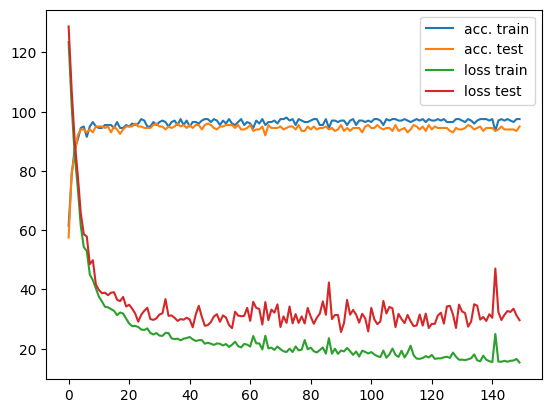

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[], [], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j + 1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        yhat, outputs = forward(params, X)

        L, acc = loss_accuracy(yhat, Y)

        L.backward()

        params = sgd(params, eta)

    # Calculate performance metrics
    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(
        iteration, acctrain, Ltrain.item(), acctest, Ltest.item())
    print(title)

    # Detach to remove predictions from the computational graph in autograd
    if iteration % 25 == 0:
        data.plot_data_with_grid(Ygrid.detach(), title)

    curves[0].append(acctrain.item())
    curves[1].append(acctest.item())
    curves[2].append(Ltrain.item())
    curves[3].append(Ltest.item())

# Plotting the performance curves
fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()


# Part 3 : Simplification of the forward pass with `torch.nn`

`init_params` and `forward` are replaced by the `init_model` function which defines the network architecture and the loss.

In [ ]:
def init_model(nx, nh, ny):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx, nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh, ny)
    )
    loss = torch.nn.CrossEntropyLoss()

    ####################
    ##      END        #
    ####################

    return model, loss

In [28]:
def loss_accuracy(loss, Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    # call the loss function

    L = loss(Yhat, Y)
    acc = torch.mean((Yhat.argmax(1) == Y.argmax(1)).float()) * 100

    ####################
    ##      END        #
    ####################

    return L, acc

In [29]:
def sgd(model, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    with torch.no_grad():
        for param in model.parameters():
            param -= eta * param.grad
            param.grad.zero_()

    ####################
    ##      END        #
    ####################
    return model

## Global learning procedure with autograd and `torch.nn`

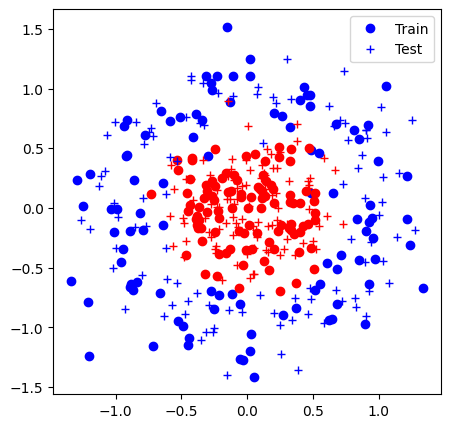

Iter 0: Acc train 50.0% (0.73), acc test 50.0% (0.73)


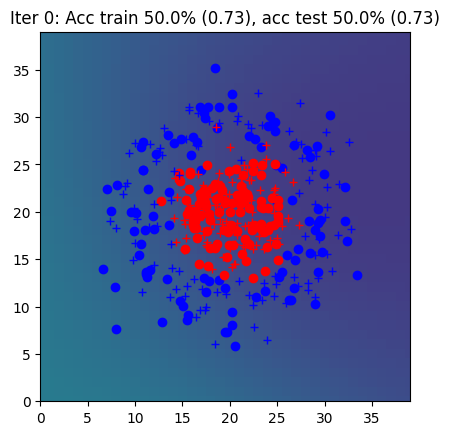

Iter 1: Acc train 50.0% (0.70), acc test 50.0% (0.70)
Iter 2: Acc train 47.0% (0.70), acc test 49.0% (0.69)
Iter 3: Acc train 61.5% (0.69), acc test 61.0% (0.69)
Iter 4: Acc train 50.5% (0.69), acc test 50.0% (0.69)
Iter 5: Acc train 53.0% (0.69), acc test 50.5% (0.69)
Iter 6: Acc train 58.5% (0.69), acc test 54.5% (0.69)
Iter 7: Acc train 58.5% (0.69), acc test 54.0% (0.69)
Iter 8: Acc train 61.5% (0.69), acc test 61.0% (0.69)
Iter 9: Acc train 65.5% (0.69), acc test 63.0% (0.69)
Iter 10: Acc train 66.5% (0.69), acc test 63.0% (0.69)
Iter 11: Acc train 64.0% (0.69), acc test 62.0% (0.69)
Iter 12: Acc train 67.0% (0.69), acc test 63.0% (0.69)
Iter 13: Acc train 67.5% (0.69), acc test 63.0% (0.69)
Iter 14: Acc train 67.0% (0.69), acc test 63.5% (0.69)
Iter 15: Acc train 66.0% (0.68), acc test 63.5% (0.69)
Iter 16: Acc train 65.5% (0.68), acc test 63.5% (0.69)
Iter 17: Acc train 66.5% (0.68), acc test 64.0% (0.68)
Iter 18: Acc train 67.0% (0.68), acc test 64.5% (0.68)
Iter 19: Acc train 

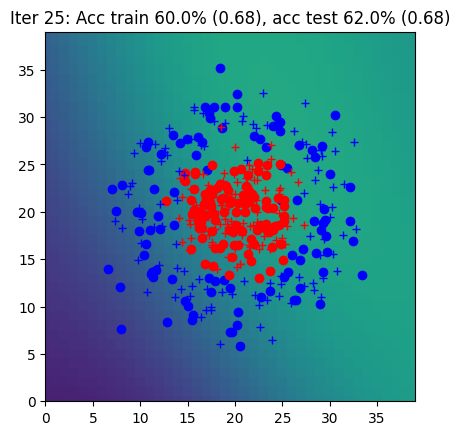

Iter 26: Acc train 63.0% (0.68), acc test 64.0% (0.68)
Iter 27: Acc train 63.0% (0.68), acc test 64.0% (0.68)
Iter 28: Acc train 65.0% (0.67), acc test 63.5% (0.68)
Iter 29: Acc train 65.0% (0.67), acc test 63.5% (0.68)
Iter 30: Acc train 63.5% (0.67), acc test 64.5% (0.67)
Iter 31: Acc train 67.5% (0.67), acc test 65.0% (0.67)
Iter 32: Acc train 67.5% (0.67), acc test 64.5% (0.67)
Iter 33: Acc train 68.0% (0.67), acc test 64.5% (0.67)
Iter 34: Acc train 68.5% (0.67), acc test 64.0% (0.67)
Iter 35: Acc train 67.5% (0.67), acc test 65.0% (0.67)
Iter 36: Acc train 68.0% (0.67), acc test 65.0% (0.67)
Iter 37: Acc train 68.0% (0.67), acc test 65.5% (0.67)
Iter 38: Acc train 68.0% (0.66), acc test 65.5% (0.67)
Iter 39: Acc train 68.0% (0.66), acc test 65.5% (0.66)
Iter 40: Acc train 65.5% (0.66), acc test 66.0% (0.66)
Iter 41: Acc train 68.0% (0.66), acc test 65.5% (0.66)
Iter 42: Acc train 68.0% (0.66), acc test 66.0% (0.66)
Iter 43: Acc train 69.0% (0.66), acc test 65.5% (0.66)
Iter 44: A

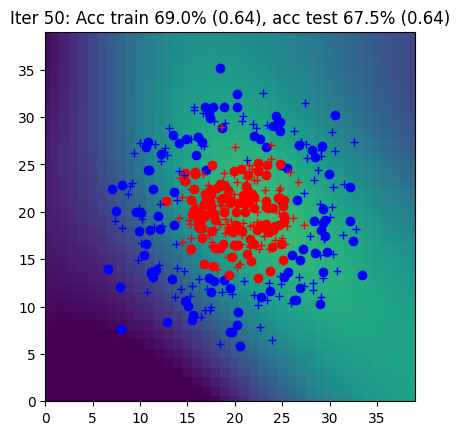

Iter 51: Acc train 69.5% (0.64), acc test 68.0% (0.64)
Iter 52: Acc train 70.0% (0.64), acc test 68.0% (0.64)
Iter 53: Acc train 70.5% (0.63), acc test 69.0% (0.64)
Iter 54: Acc train 72.5% (0.63), acc test 73.5% (0.63)
Iter 55: Acc train 76.5% (0.63), acc test 76.5% (0.63)
Iter 56: Acc train 76.5% (0.63), acc test 76.5% (0.63)
Iter 57: Acc train 75.5% (0.62), acc test 76.0% (0.63)
Iter 58: Acc train 76.5% (0.62), acc test 76.5% (0.62)
Iter 59: Acc train 76.5% (0.62), acc test 77.5% (0.62)
Iter 60: Acc train 76.5% (0.61), acc test 79.0% (0.62)
Iter 61: Acc train 79.0% (0.61), acc test 82.0% (0.61)
Iter 62: Acc train 79.5% (0.61), acc test 81.5% (0.61)
Iter 63: Acc train 78.5% (0.60), acc test 82.0% (0.61)
Iter 64: Acc train 79.0% (0.60), acc test 82.0% (0.60)
Iter 65: Acc train 78.5% (0.59), acc test 81.5% (0.60)
Iter 66: Acc train 79.0% (0.59), acc test 80.5% (0.59)
Iter 67: Acc train 78.5% (0.59), acc test 79.5% (0.59)
Iter 68: Acc train 82.5% (0.58), acc test 83.5% (0.59)
Iter 69: A

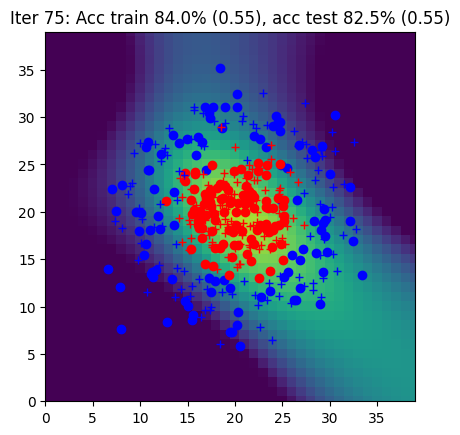

Iter 76: Acc train 85.0% (0.54), acc test 83.5% (0.55)
Iter 77: Acc train 85.5% (0.54), acc test 83.5% (0.54)
Iter 78: Acc train 84.5% (0.53), acc test 83.0% (0.54)
Iter 79: Acc train 84.5% (0.53), acc test 83.0% (0.53)
Iter 80: Acc train 85.5% (0.52), acc test 83.5% (0.53)
Iter 81: Acc train 85.0% (0.52), acc test 83.5% (0.53)
Iter 82: Acc train 85.0% (0.51), acc test 83.0% (0.52)
Iter 83: Acc train 85.5% (0.51), acc test 81.5% (0.51)
Iter 84: Acc train 85.0% (0.50), acc test 83.0% (0.51)
Iter 85: Acc train 85.5% (0.50), acc test 82.5% (0.50)
Iter 86: Acc train 85.5% (0.49), acc test 82.5% (0.50)
Iter 87: Acc train 85.0% (0.49), acc test 83.0% (0.49)
Iter 88: Acc train 85.5% (0.48), acc test 83.0% (0.49)
Iter 89: Acc train 85.5% (0.48), acc test 83.0% (0.48)
Iter 90: Acc train 86.0% (0.47), acc test 83.0% (0.48)
Iter 91: Acc train 87.5% (0.47), acc test 85.5% (0.47)
Iter 92: Acc train 87.0% (0.46), acc test 84.0% (0.47)
Iter 93: Acc train 87.5% (0.46), acc test 85.0% (0.46)
Iter 94: A

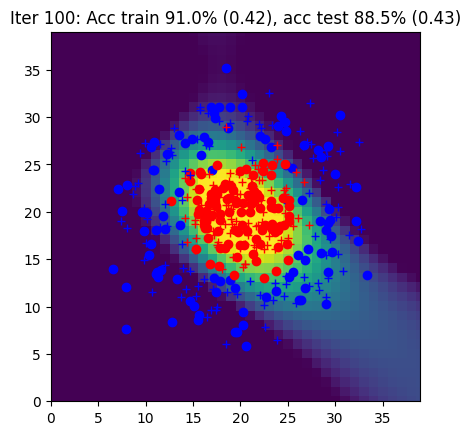

Iter 101: Acc train 91.0% (0.41), acc test 89.0% (0.42)
Iter 102: Acc train 91.5% (0.41), acc test 89.5% (0.42)
Iter 103: Acc train 92.0% (0.40), acc test 90.0% (0.41)
Iter 104: Acc train 92.5% (0.40), acc test 90.0% (0.41)
Iter 105: Acc train 93.0% (0.39), acc test 90.0% (0.40)
Iter 106: Acc train 93.5% (0.39), acc test 90.0% (0.40)
Iter 107: Acc train 93.5% (0.38), acc test 90.5% (0.39)
Iter 108: Acc train 93.5% (0.38), acc test 90.0% (0.39)
Iter 109: Acc train 93.5% (0.37), acc test 91.0% (0.38)
Iter 110: Acc train 94.0% (0.37), acc test 92.0% (0.38)
Iter 111: Acc train 93.5% (0.36), acc test 92.0% (0.37)
Iter 112: Acc train 93.5% (0.36), acc test 92.0% (0.37)
Iter 113: Acc train 93.5% (0.36), acc test 93.0% (0.36)
Iter 114: Acc train 93.5% (0.35), acc test 93.0% (0.36)
Iter 115: Acc train 93.5% (0.35), acc test 93.0% (0.35)
Iter 116: Acc train 94.0% (0.34), acc test 93.5% (0.35)
Iter 117: Acc train 93.5% (0.34), acc test 93.5% (0.34)
Iter 118: Acc train 94.5% (0.33), acc test 93.5%

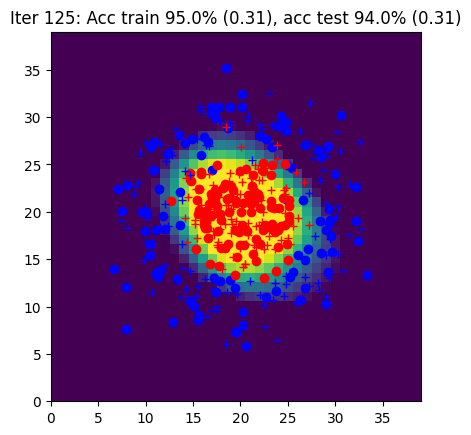

Iter 126: Acc train 95.5% (0.30), acc test 93.5% (0.31)
Iter 127: Acc train 95.5% (0.30), acc test 94.0% (0.31)
Iter 128: Acc train 95.5% (0.30), acc test 94.0% (0.30)
Iter 129: Acc train 95.0% (0.29), acc test 94.0% (0.30)
Iter 130: Acc train 95.5% (0.29), acc test 94.0% (0.29)
Iter 131: Acc train 95.5% (0.29), acc test 94.0% (0.29)
Iter 132: Acc train 95.5% (0.28), acc test 94.0% (0.29)
Iter 133: Acc train 95.5% (0.28), acc test 94.0% (0.28)
Iter 134: Acc train 95.5% (0.28), acc test 94.0% (0.28)
Iter 135: Acc train 96.0% (0.28), acc test 94.0% (0.28)
Iter 136: Acc train 95.5% (0.27), acc test 94.0% (0.28)
Iter 137: Acc train 95.0% (0.27), acc test 94.0% (0.28)
Iter 138: Acc train 96.0% (0.27), acc test 94.0% (0.27)
Iter 139: Acc train 95.5% (0.26), acc test 94.0% (0.27)
Iter 140: Acc train 94.0% (0.26), acc test 93.5% (0.27)
Iter 141: Acc train 94.5% (0.26), acc test 93.5% (0.26)
Iter 142: Acc train 95.0% (0.26), acc test 94.0% (0.26)
Iter 143: Acc train 94.0% (0.26), acc test 93.5%

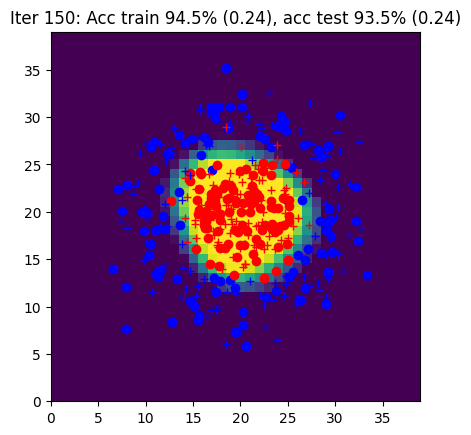

Iter 151: Acc train 94.5% (0.24), acc test 93.5% (0.24)
Iter 152: Acc train 94.5% (0.24), acc test 93.5% (0.24)
Iter 153: Acc train 95.0% (0.23), acc test 93.5% (0.24)
Iter 154: Acc train 94.5% (0.23), acc test 93.5% (0.24)
Iter 155: Acc train 94.5% (0.23), acc test 94.0% (0.24)
Iter 156: Acc train 94.5% (0.23), acc test 93.5% (0.23)
Iter 157: Acc train 95.0% (0.23), acc test 93.5% (0.23)
Iter 158: Acc train 94.5% (0.23), acc test 94.0% (0.23)
Iter 159: Acc train 95.0% (0.22), acc test 93.5% (0.23)
Iter 160: Acc train 94.5% (0.22), acc test 94.0% (0.23)
Iter 161: Acc train 94.5% (0.22), acc test 94.0% (0.23)
Iter 162: Acc train 94.5% (0.22), acc test 94.0% (0.23)
Iter 163: Acc train 95.0% (0.22), acc test 93.5% (0.22)
Iter 164: Acc train 95.0% (0.22), acc test 94.0% (0.22)
Iter 165: Acc train 95.0% (0.22), acc test 94.0% (0.22)
Iter 166: Acc train 95.0% (0.21), acc test 94.0% (0.22)
Iter 167: Acc train 95.0% (0.21), acc test 94.0% (0.22)
Iter 168: Acc train 95.0% (0.21), acc test 94.0%

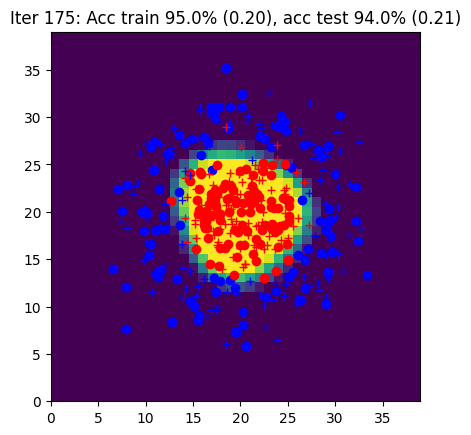

Iter 176: Acc train 95.0% (0.20), acc test 94.0% (0.21)
Iter 177: Acc train 94.5% (0.20), acc test 94.0% (0.21)
Iter 178: Acc train 95.0% (0.20), acc test 93.5% (0.20)
Iter 179: Acc train 95.0% (0.20), acc test 94.0% (0.20)
Iter 180: Acc train 95.0% (0.20), acc test 94.0% (0.20)
Iter 181: Acc train 95.0% (0.20), acc test 94.0% (0.20)
Iter 182: Acc train 95.0% (0.20), acc test 93.5% (0.20)
Iter 183: Acc train 95.0% (0.20), acc test 94.0% (0.20)
Iter 184: Acc train 95.0% (0.20), acc test 94.0% (0.20)
Iter 185: Acc train 95.0% (0.19), acc test 93.5% (0.20)
Iter 186: Acc train 95.0% (0.19), acc test 94.0% (0.20)
Iter 187: Acc train 94.5% (0.19), acc test 94.0% (0.20)
Iter 188: Acc train 94.5% (0.19), acc test 94.5% (0.20)
Iter 189: Acc train 94.5% (0.19), acc test 94.0% (0.20)
Iter 190: Acc train 95.0% (0.19), acc test 94.0% (0.19)
Iter 191: Acc train 95.0% (0.19), acc test 93.5% (0.19)
Iter 192: Acc train 95.0% (0.19), acc test 94.0% (0.19)
Iter 193: Acc train 94.5% (0.19), acc test 94.5%

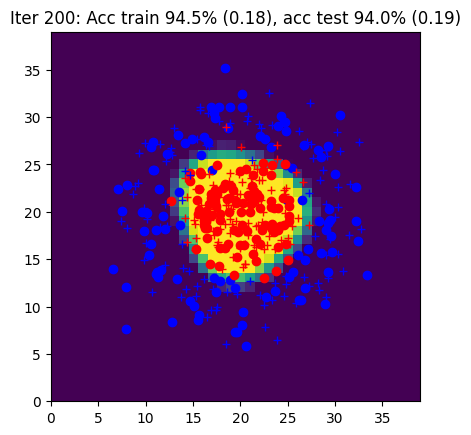

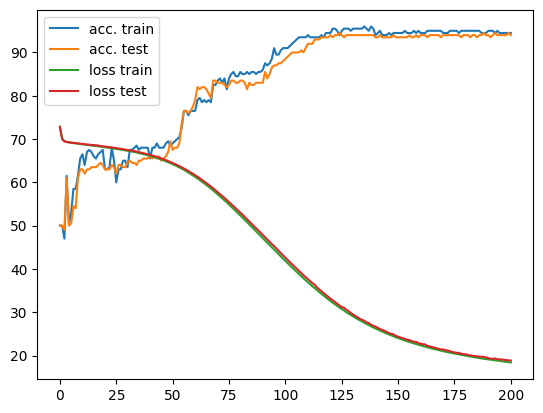

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss = init_model(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(201):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy, sgd
        # the forward with the predict method from the model
        # and the backward function with autograd

        Yhat = model(X)

        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()

        model = sgd(model, eta)

    ####################
    ##      END        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title) if iteration % 25 == 0 else None

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach()*100)
    curves[3].append(Ltest.detach()*100)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 4 : Simplification of the SGD with `torch.optim`

In [30]:
def init_model(nx, nh, ny, eta):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx, nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh, ny),
        # torch.nn.Softmax(),
    )
    loss = torch.nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=eta)

    ####################
    ##      END        #
    ####################

    return model, loss, optim

The `sgd` function is replaced by calling the `optim.zero_grad()` before the backward and `optim.step()` after.

## Algorithme global d'apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`)

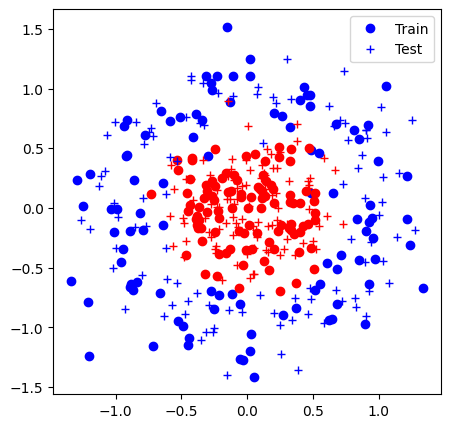

Iter 0: Acc train 55.5% (0.69), acc test 52.0% (0.69)


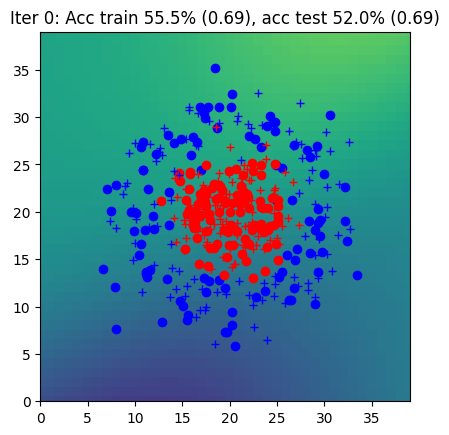

Iter 1: Acc train 56.5% (0.69), acc test 52.5% (0.69)
Iter 2: Acc train 58.5% (0.69), acc test 57.5% (0.69)
Iter 3: Acc train 62.0% (0.69), acc test 61.0% (0.69)
Iter 4: Acc train 61.5% (0.69), acc test 59.5% (0.69)
Iter 5: Acc train 65.0% (0.69), acc test 64.5% (0.68)
Iter 6: Acc train 61.5% (0.68), acc test 62.5% (0.68)
Iter 7: Acc train 65.0% (0.68), acc test 66.5% (0.68)
Iter 8: Acc train 66.0% (0.68), acc test 66.5% (0.68)
Iter 9: Acc train 65.5% (0.68), acc test 65.5% (0.68)
Iter 10: Acc train 68.5% (0.68), acc test 65.0% (0.68)
Iter 11: Acc train 67.0% (0.68), acc test 66.5% (0.68)
Iter 12: Acc train 69.5% (0.68), acc test 66.5% (0.68)
Iter 13: Acc train 69.5% (0.68), acc test 69.0% (0.68)
Iter 14: Acc train 68.0% (0.68), acc test 71.0% (0.68)
Iter 15: Acc train 71.5% (0.68), acc test 71.5% (0.67)
Iter 16: Acc train 69.5% (0.67), acc test 71.0% (0.67)
Iter 17: Acc train 69.0% (0.67), acc test 69.0% (0.67)
Iter 18: Acc train 68.0% (0.67), acc test 69.5% (0.67)
Iter 19: Acc train 

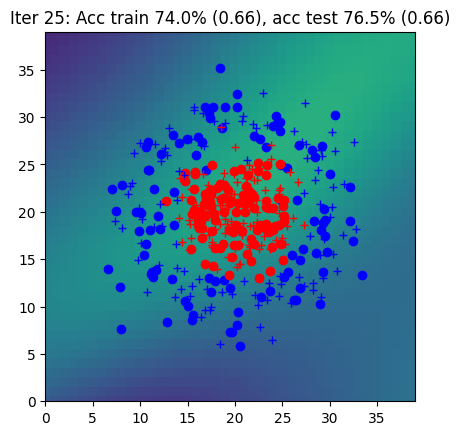

Iter 26: Acc train 74.0% (0.66), acc test 77.0% (0.66)
Iter 27: Acc train 74.5% (0.66), acc test 77.0% (0.66)
Iter 28: Acc train 76.0% (0.66), acc test 77.0% (0.66)
Iter 29: Acc train 76.5% (0.66), acc test 77.5% (0.65)
Iter 30: Acc train 76.5% (0.65), acc test 77.5% (0.65)
Iter 31: Acc train 75.5% (0.65), acc test 76.5% (0.65)
Iter 32: Acc train 75.5% (0.65), acc test 77.0% (0.65)
Iter 33: Acc train 78.0% (0.65), acc test 78.5% (0.65)
Iter 34: Acc train 77.5% (0.65), acc test 78.5% (0.64)
Iter 35: Acc train 77.5% (0.64), acc test 78.0% (0.64)
Iter 36: Acc train 78.5% (0.64), acc test 79.5% (0.64)
Iter 37: Acc train 78.5% (0.64), acc test 80.0% (0.64)
Iter 38: Acc train 78.5% (0.64), acc test 80.5% (0.63)
Iter 39: Acc train 76.5% (0.63), acc test 76.5% (0.63)
Iter 40: Acc train 77.5% (0.63), acc test 77.5% (0.63)
Iter 41: Acc train 78.5% (0.63), acc test 80.5% (0.63)
Iter 42: Acc train 79.0% (0.63), acc test 79.5% (0.62)
Iter 43: Acc train 78.5% (0.62), acc test 80.0% (0.62)
Iter 44: A

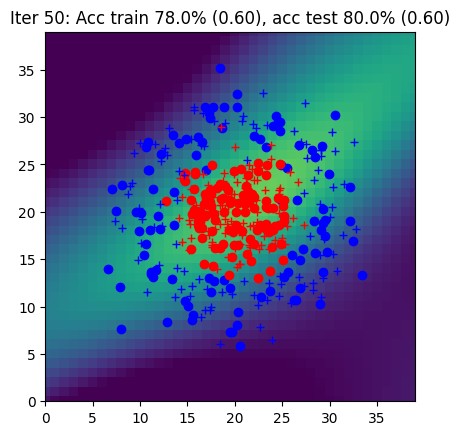

Iter 51: Acc train 78.5% (0.60), acc test 81.0% (0.59)
Iter 52: Acc train 78.5% (0.59), acc test 81.0% (0.59)
Iter 53: Acc train 78.5% (0.59), acc test 81.0% (0.59)
Iter 54: Acc train 78.0% (0.59), acc test 80.5% (0.58)
Iter 55: Acc train 78.0% (0.58), acc test 80.5% (0.58)
Iter 56: Acc train 79.0% (0.58), acc test 83.0% (0.58)
Iter 57: Acc train 78.5% (0.57), acc test 80.5% (0.57)
Iter 58: Acc train 78.0% (0.57), acc test 81.5% (0.57)
Iter 59: Acc train 78.5% (0.57), acc test 80.5% (0.56)
Iter 60: Acc train 79.0% (0.56), acc test 81.0% (0.56)
Iter 61: Acc train 78.0% (0.56), acc test 81.0% (0.56)
Iter 62: Acc train 79.0% (0.55), acc test 83.5% (0.55)
Iter 63: Acc train 77.5% (0.55), acc test 81.5% (0.55)
Iter 64: Acc train 78.0% (0.55), acc test 82.0% (0.54)
Iter 65: Acc train 78.5% (0.54), acc test 81.5% (0.54)
Iter 66: Acc train 79.5% (0.54), acc test 82.5% (0.53)
Iter 67: Acc train 82.0% (0.53), acc test 83.5% (0.53)
Iter 68: Acc train 78.5% (0.53), acc test 82.0% (0.53)
Iter 69: A

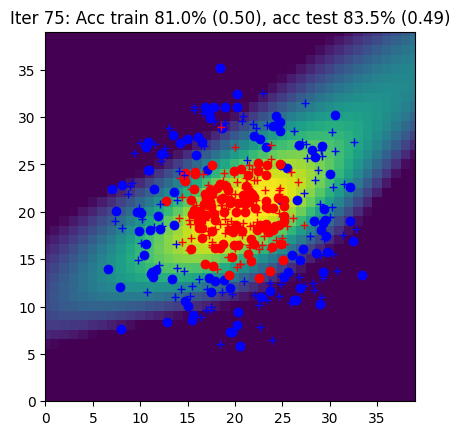

Iter 76: Acc train 80.5% (0.49), acc test 83.5% (0.49)
Iter 77: Acc train 81.5% (0.49), acc test 83.5% (0.48)
Iter 78: Acc train 82.5% (0.48), acc test 84.0% (0.48)
Iter 79: Acc train 83.0% (0.48), acc test 85.0% (0.48)
Iter 80: Acc train 82.0% (0.47), acc test 83.5% (0.47)
Iter 81: Acc train 82.0% (0.47), acc test 84.5% (0.47)
Iter 82: Acc train 82.0% (0.46), acc test 84.5% (0.46)
Iter 83: Acc train 82.0% (0.46), acc test 84.5% (0.46)
Iter 84: Acc train 82.0% (0.45), acc test 85.0% (0.45)
Iter 85: Acc train 82.0% (0.45), acc test 85.5% (0.45)
Iter 86: Acc train 82.5% (0.44), acc test 86.0% (0.44)
Iter 87: Acc train 82.0% (0.44), acc test 86.0% (0.44)
Iter 88: Acc train 85.5% (0.43), acc test 87.0% (0.43)
Iter 89: Acc train 86.0% (0.43), acc test 87.0% (0.43)
Iter 90: Acc train 83.5% (0.42), acc test 86.0% (0.42)
Iter 91: Acc train 84.5% (0.42), acc test 87.0% (0.42)
Iter 92: Acc train 85.5% (0.41), acc test 88.0% (0.41)
Iter 93: Acc train 85.5% (0.41), acc test 87.5% (0.41)
Iter 94: A

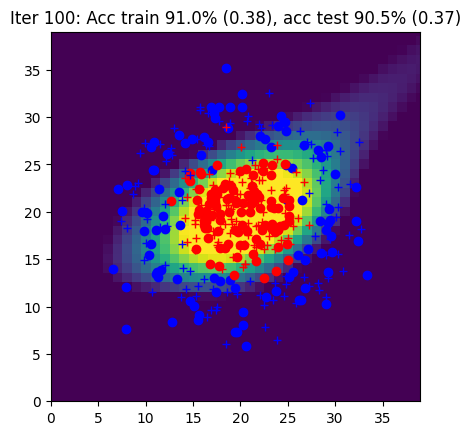

Iter 101: Acc train 91.5% (0.37), acc test 91.5% (0.37)
Iter 102: Acc train 93.0% (0.37), acc test 91.5% (0.36)
Iter 103: Acc train 92.0% (0.36), acc test 93.5% (0.36)
Iter 104: Acc train 92.0% (0.36), acc test 93.5% (0.36)
Iter 105: Acc train 93.0% (0.35), acc test 93.5% (0.35)
Iter 106: Acc train 93.0% (0.35), acc test 94.0% (0.35)
Iter 107: Acc train 92.5% (0.34), acc test 94.0% (0.34)
Iter 108: Acc train 93.5% (0.34), acc test 94.0% (0.34)
Iter 109: Acc train 94.0% (0.33), acc test 94.0% (0.33)
Iter 110: Acc train 94.0% (0.33), acc test 94.5% (0.33)
Iter 111: Acc train 93.0% (0.33), acc test 95.5% (0.33)
Iter 112: Acc train 93.5% (0.32), acc test 95.5% (0.32)
Iter 113: Acc train 94.0% (0.32), acc test 94.5% (0.32)
Iter 114: Acc train 94.0% (0.31), acc test 94.5% (0.31)
Iter 115: Acc train 93.5% (0.31), acc test 95.5% (0.31)
Iter 116: Acc train 93.5% (0.31), acc test 95.5% (0.31)
Iter 117: Acc train 93.5% (0.30), acc test 95.5% (0.30)
Iter 118: Acc train 93.5% (0.30), acc test 95.5%

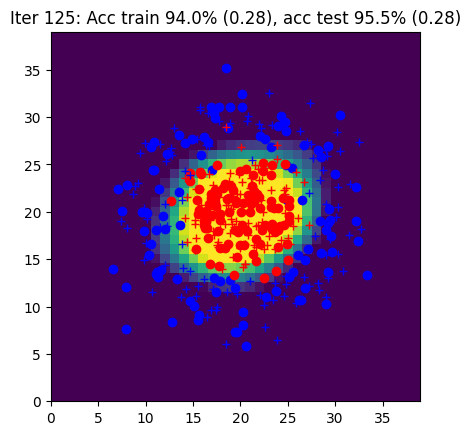

Iter 126: Acc train 94.5% (0.27), acc test 95.5% (0.27)
Iter 127: Acc train 94.0% (0.27), acc test 94.5% (0.27)
Iter 128: Acc train 94.5% (0.27), acc test 96.0% (0.27)
Iter 129: Acc train 94.0% (0.26), acc test 95.0% (0.27)
Iter 130: Acc train 94.0% (0.26), acc test 95.0% (0.26)
Iter 131: Acc train 94.5% (0.26), acc test 95.0% (0.26)
Iter 132: Acc train 94.5% (0.26), acc test 95.0% (0.26)
Iter 133: Acc train 95.0% (0.25), acc test 94.5% (0.26)
Iter 134: Acc train 94.5% (0.25), acc test 94.0% (0.25)
Iter 135: Acc train 95.0% (0.25), acc test 94.0% (0.25)
Iter 136: Acc train 94.5% (0.25), acc test 94.0% (0.25)
Iter 137: Acc train 94.5% (0.24), acc test 94.0% (0.25)
Iter 138: Acc train 95.5% (0.24), acc test 94.0% (0.25)
Iter 139: Acc train 95.0% (0.24), acc test 94.0% (0.24)
Iter 140: Acc train 94.5% (0.24), acc test 94.5% (0.24)
Iter 141: Acc train 95.5% (0.23), acc test 94.0% (0.24)
Iter 142: Acc train 95.5% (0.23), acc test 94.0% (0.24)
Iter 143: Acc train 95.5% (0.23), acc test 94.0%

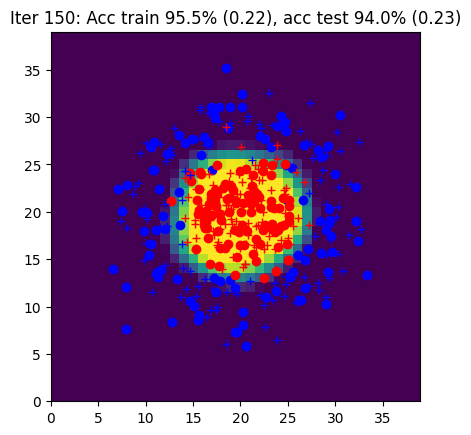

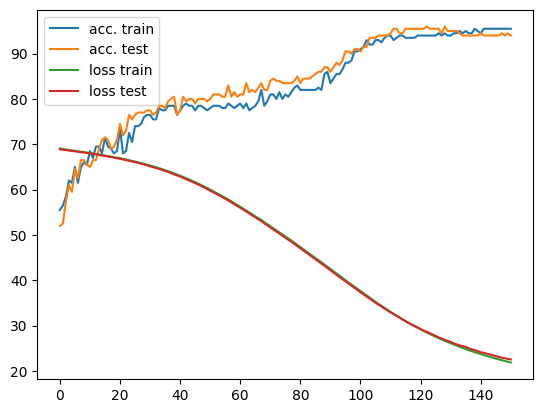

In [31]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(151):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step

        optim.zero_grad()

        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()

        optim.step()

    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title) if iteration % 25 == 0 else None

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach()*100)
    curves[3].append(Ltest.detach()*100)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 5 : MNIST

Apply the code from previous part code to the MNIST dataset.

In [ ]:
# init
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 100
nx = data.Xtrain.shape[1]
nh = 100
ny = data.Ytrain.shape[1]
eta = 0.03

Iter 0: Acc train 85.1% (0.56), acc test 85.8% (0.54)
Iter 1: Acc train 86.5% (0.47), acc test 87.1% (0.46)
Iter 2: Acc train 87.6% (0.43), acc test 87.7% (0.42)
Iter 3: Acc train 87.4% (0.43), acc test 87.7% (0.42)
Iter 4: Acc train 87.6% (0.41), acc test 88.0% (0.40)
Iter 5: Acc train 88.8% (0.39), acc test 88.9% (0.38)
Iter 6: Acc train 88.3% (0.40), acc test 88.9% (0.39)
Iter 7: Acc train 88.3% (0.39), acc test 88.8% (0.38)
Iter 8: Acc train 88.9% (0.38), acc test 88.8% (0.38)
Iter 9: Acc train 88.2% (0.40), acc test 88.7% (0.38)
Iter 10: Acc train 89.0% (0.37), acc test 89.1% (0.36)
Iter 11: Acc train 90.1% (0.34), acc test 90.2% (0.33)
Iter 12: Acc train 90.0% (0.33), acc test 90.1% (0.33)
Iter 13: Acc train 89.2% (0.36), acc test 89.0% (0.36)
Iter 14: Acc train 87.9% (0.40), acc test 88.1% (0.39)
Iter 15: Acc train 88.6% (0.36), acc test 89.0% (0.35)
Iter 16: Acc train 88.3% (0.39), acc test 88.6% (0.38)
Iter 17: Acc train 88.9% (0.37), acc test 89.1% (0.35)
Iter 18: Acc train 8

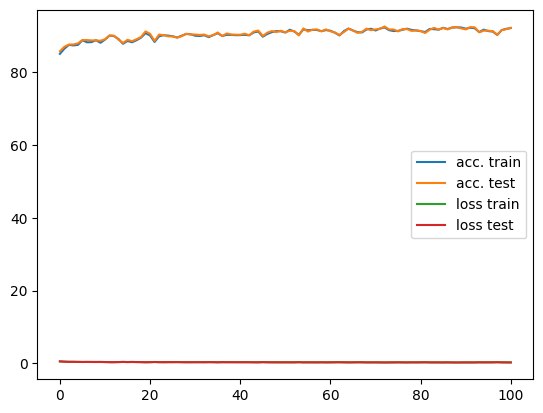

In [ ]:
model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(101):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step

        optim.zero_grad()

        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()

        optim.step()

    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain.detach())
    curves[3].append(Ltest.detach())

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 6: Bonus: SVM


Train a SVM model on the Circles dataset.

Ideas :
- First try a linear SVM (sklearn.svm.LinearSVC dans scikit-learn). Does it work well ? Why ?
- Then try more complex kernels (sklearn.svm.SVC). Which one is the best ? why ?
- Does the parameter C of regularization have an impact? Why ?

In [12]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()

def plot_svm_predictions(data, predictions, title=None):
      plt.figure(2)
      plt.clf()
      if title is not None:
        plt.title(title)
      plt.imshow(np.reshape(predictions, (40,40)))
      plt.plot(data._Xtrain[data._Ytrain[:,0] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train")
      plt.plot(data._Xtrain[data._Ytrain[:,1] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,1] == 1,1]*10+20, 'ro')
      plt.plot(data._Xtest[data._Ytest[:,0] == 1,0]*10+20, data._Xtest[data._Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
      plt.plot(data._Xtest[data._Ytest[:,1] == 1,0]*10+20, data._Xtest[data._Ytest[:,1] == 1,1]*10+20, 'r+')
      plt.xlim(0,39)
      plt.ylim(0,39)
      plt.clim(0.3,0.7)
      plt.draw()
      plt.pause(1e-3)

In [9]:
import sklearn.svm
from sklearn.svm import LinearSVC, SVC
############################
### Your code here   #######
### Train the SVM    #######
## See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
## and https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################

svm = LinearSVC()
svm.fit(Xtrain, Ytrain)

###########################

LinearSVC()

Accuracy : 53.00


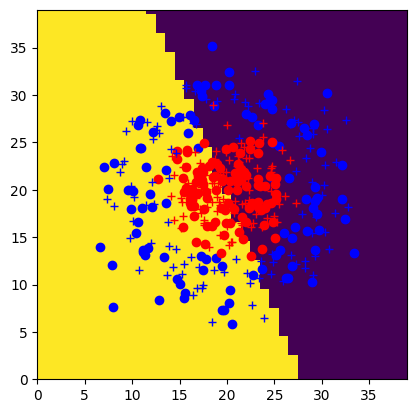

In [8]:
## Print results

Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)

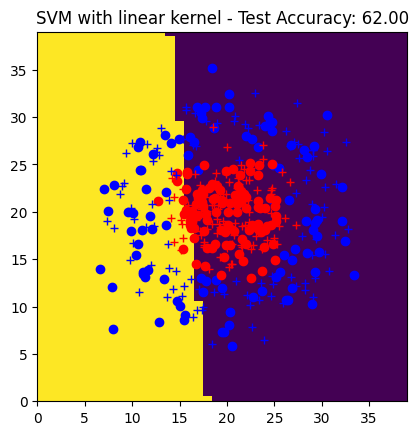

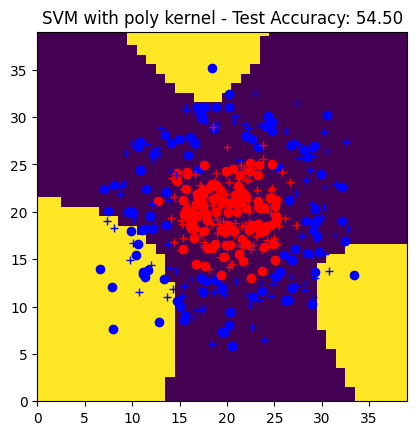

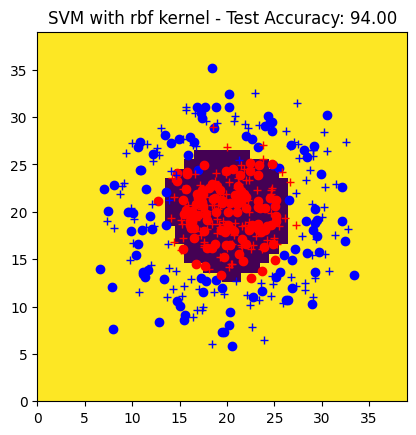

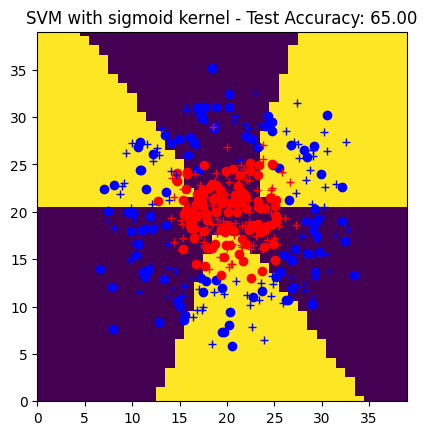

Kernel Comparison Results:
linear kernel test accuracy: 62.00
poly kernel test accuracy: 54.50
rbf kernel test accuracy: 94.00
sigmoid kernel test accuracy: 65.00


In [16]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(Xtrain, Ytrain)
    predictions = svm.predict(Xgrid)
    test_accuracy = svm.score(Xtest, Ytest)
    results[kernel] = test_accuracy

    plot_svm_predictions(data, predictions, f'SVM with {kernel} kernel - Test Accuracy: {100 * test_accuracy:.2f}')

print("Kernel Comparison Results:")
for kernel, accuracy in results.items():
    print(f"{kernel} kernel test accuracy: {100 * accuracy:.2f}")

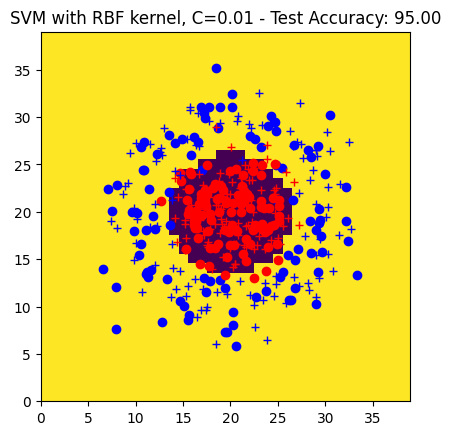

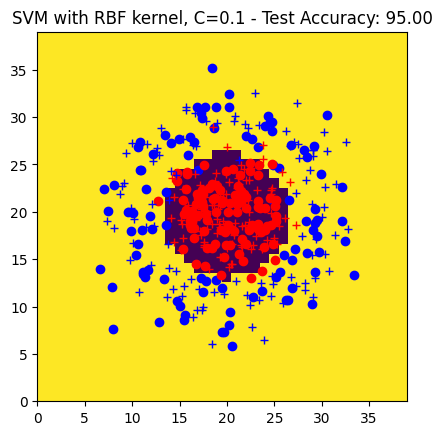

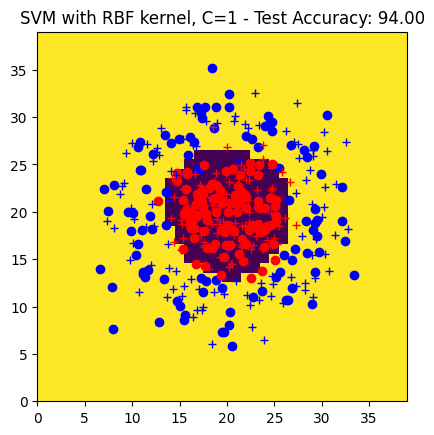

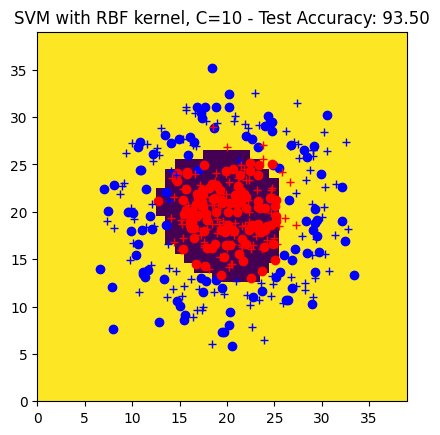

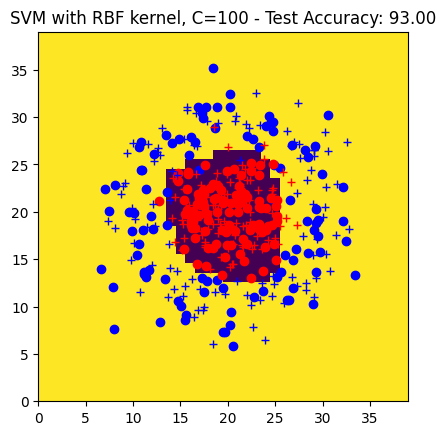

Regularization Parameter (C) Comparison Results:
C = 0.01: Test accuracy = 95.00
C = 0.1: Test accuracy = 95.00
C = 1: Test accuracy = 94.00
C = 10: Test accuracy = 93.50
C = 100: Test accuracy = 93.00


In [17]:
C_values = [0.01, 0.1, 1, 10, 100]
results = {}

for C in C_values:
    svm = SVC(kernel='rbf', C=C)
    svm.fit(Xtrain, Ytrain)
    predictions = svm.predict(Xgrid)
    test_accuracy = svm.score(Xtest, Ytest)
    results[C] = test_accuracy

    plot_svm_predictions(data, predictions, f'SVM with RBF kernel, C={C} - Test Accuracy: {100 * test_accuracy:.2f}')

print("Regularization Parameter (C) Comparison Results:")
for C, accuracy in results.items():
    print(f"C = {C}: Test accuracy = {100 * accuracy:.2f}")